✅ Dataset loaded successfully!
Shape: (10000, 17)
   Field_ID  Year    Crop Previous_Crop  Soil_pH  Soil_Nitrogen  \
0       428  2018   Wheat        Legume      6.1             37   
1       220  2022  Barley         Wheat      6.6             52   
2       275  2020   Maize         Maize      7.4             40   
3       336  2022   Wheat          Rice      5.7             39   
4       538  2019   Wheat          Rice      6.1             50   

   Soil_Phosphorus  Soil_Potassium  Organic_Matter  Rainfall  Avg_Temperature  \
0               19             126             3.5       679             19.0   
1               28             134             3.2       542             27.7   
2               18             125             3.1       583             28.2   
3               26             156             2.8       435             18.5   
4               26             130             3.1       507             26.0   

   NDVI Irrigation Fertilizer_Type  Yield Recommended_Next_C

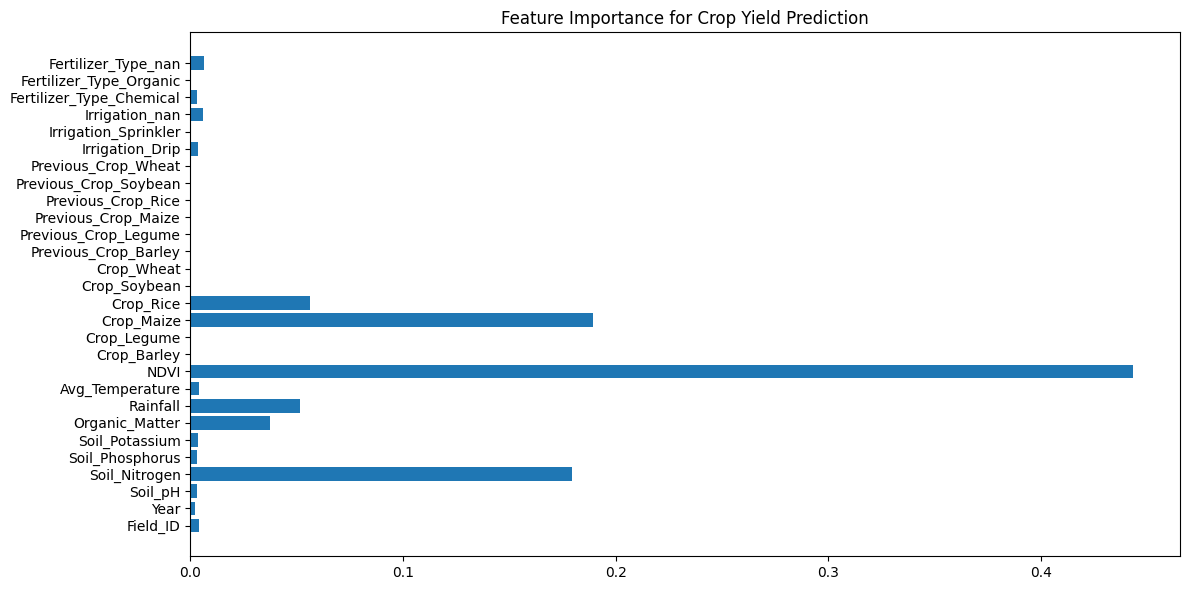


💾 Model saved as 'crop_model.pkl' successfully!

🌾 Predicted Yield for Sample Field: 8.05 tons/ha


In [4]:
# # -*- coding: utf-8 -*-
# """
# Crop Yield Prediction - Full Pipeline
# """

# # ---------------------------
# # 1. Import Libraries
# # ---------------------------
# import pandas as pd
# import numpy as np
# import random
# import seaborn as sns
# import matplotlib.pyplot as plt
# from scipy.stats import chi2_contingency

# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error, r2_score

# # ---------------------------
# # 2. Generate Synthetic Dataset
# # ---------------------------
# random.seed(42)
# np.random.seed(42)

# num_fields = 500
# years = range(2018, 2024)
# crops = ['Wheat', 'Maize', 'Soybean', 'Rice', 'Barley', 'Legume']
# irrigation_types = ['None', 'Drip', 'Sprinkler']
# fertilizers = ['None', 'Chemical', 'Organic']
# sustainable_practices = ['Cover crop', 'Reduced tillage', 'Compost', 'None']

# data = []

# for _ in range(10000):
#     field = random.randint(101, 101+num_fields)
#     year = random.choice(years)
#     crop = random.choice(crops)
#     prev_crop = random.choice(crops)

#     # Soil parameters
#     soil_ph = round(random.uniform(5.5, 7.5), 1)
#     soil_N = random.randint(30, 60)
#     soil_P = random.randint(15, 30)
#     soil_K = random.randint(120, 160)
#     organic_matter = round(random.uniform(2.5, 4.0), 1)

#     # Weather
#     rainfall = random.randint(400, 800)  # mm
#     avg_temp = round(random.uniform(18, 30), 1)  # Celsius

#     # NDVI (correlates with yield)
#     ndvi = round(random.uniform(0.55, 0.80), 2)

#     # Management practices
#     irrigation = random.choice(irrigation_types)
#     fertilizer = random.choice(fertilizers)

#     # Calculate synthetic yield
#     yield_base = 2 + (soil_N*0.05) + (organic_matter*0.5) + ((rainfall-500)*0.002) + ((ndvi-0.55)*10)
#     if crop == 'Maize':
#         yield_base *= 1.2
#     elif crop == 'Soybean':
#         yield_base *= 1.0
#     elif crop == 'Rice':
#         yield_base *= 1.1

#     # Slight effect of irrigation and fertilizer
#     if irrigation == 'Drip':
#         yield_base *= 1.05
#     elif irrigation == 'Sprinkler':
#         yield_base *= 1.03

#     if fertilizer == 'Chemical':
#         yield_base *= 1.05
#     elif fertilizer == 'Organic':
#         yield_base *= 1.03

#     yield_t = round(max(yield_base, 1.0), 2)  # ensure yield >=1

#     # Recommend next crop based on rotation
#     if crop in ['Wheat', 'Barley']:
#         next_crop = 'Legume'
#     elif crop in ['Maize', 'Rice']:
#         next_crop = 'Wheat'
#     else:
#         next_crop = random.choice(crops)

#     # Sustainable practice recommendation
#     if organic_matter < 3:
#         practice = 'Compost'
#     elif crop in ['Maize', 'Rice']:
#         practice = 'Cover crop'
#     else:
#         practice = random.choice(sustainable_practices)

#     data.append([field, year, crop, prev_crop, soil_ph, soil_N, soil_P, soil_K,
#                  organic_matter, rainfall, avg_temp, ndvi, irrigation, fertilizer,
#                  yield_t, next_crop, practice])

# # Create DataFrame
# df = pd.DataFrame(data, columns=['Field_ID','Year','Crop','Previous_Crop','Soil_pH',
#                                  'Soil_Nitrogen','Soil_Phosphorus','Soil_Potassium',
#                                  'Organic_Matter','Rainfall','Avg_Temperature','NDVI',
#                                  'Irrigation','Fertilizer_Type','Yield','Recommended_Next_Crop',
#                                  'Sustainable_Practice'])

# # Save to CSV
# df.to_csv('large_crop_yield_dataset.csv', index=False)
# print("✅ Large dataset with 10,000 rows created successfully!")

# # ---------------------------
# # 3. Load Dataset & EDA
# # ---------------------------
# Crop_data = pd.read_csv('large_crop_yield_dataset.csv')
# print(Crop_data.head())
# print(f"\nDataset shape: {Crop_data.shape}")
# print(f"Missing values: {Crop_data.isna().sum().sum()}")

# # Describe numerical columns
# print(Crop_data.describe())

# # Categorical and numerical columns
# cat_col = Crop_data.select_dtypes(include=['object']).columns
# num_col = Crop_data.select_dtypes(exclude=['object']).columns

# # Distribution of crops
# print(Crop_data.Crop.value_counts())

# # Correlation matrix for numeric columns
# crop_corr = Crop_data[num_col].corr()
# plt.figure(figsize=(10,8))
# sns.heatmap(crop_corr, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix for Numerical Columns')
# plt.show()

# # Chi-square test for categorical columns vs Yield
# def is_corr(x, y):
#     crosstab = pd.crosstab(index=x, columns=y)
#     chi_sq_result = chi2_contingency(crosstab)
#     p = chi_sq_result.pvalue
#     decision = 'reject' if p < 0.05 else 'accept'
#     dof = chi_sq_result.dof
#     return p, decision, dof

# for col_name in cat_col:
#     p, decision, dof = is_corr(Crop_data[col_name], Crop_data.Yield)
#     print(f'{col_name}: p-value={p:.5f}, {decision} the null hypothesis, dof={dof}')

# # ---------------------------
# # 4. Preprocessing & Model Training
# # ---------------------------
# X = Crop_data.drop(['Yield', 'Recommended_Next_Crop', 'Sustainable_Practice'], axis=1)
# y = Crop_data['Yield']

# # Categorical & numeric columns
# categorical_cols = X.select_dtypes(include=['object']).columns
# numeric_cols = X.select_dtypes(exclude=['object']).columns

# # Preprocessing
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', 'passthrough', numeric_cols),
#         ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
#     ]
# )

# # Pipeline
# model = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
# ])

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluation
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)
# print(f"\n✅ Model Trained Successfully!")
# print(f"Mean Squared Error: {mse:.2f}")
# print(f"R2 Score: {r2:.2f}")

# # ---------------------------
# # 5. Predict on New Data
# # ---------------------------
# new_data = pd.DataFrame([{
#     'Field_ID': 102,
#     'Year': 2024,
#     'Crop': 'Maize',
#     'Previous_Crop': 'Wheat',
#     'Soil_pH': 6.5,
#     'Soil_Nitrogen': 50,
#     'Soil_Phosphorus': 20,
#     'Soil_Potassium': 140,
#     'Organic_Matter': 3.5,
#     'Rainfall': 600,
#     'Avg_Temperature': 25,
#     'NDVI': 0.65,
#     'Irrigation': 'Drip',
#     'Fertilizer_Type': 'Chemical'
# }])

# predicted_yield = model.predict(new_data)
# print(f"\nPredicted Yield for new field: {predicted_yield[0]:.2f} tons/ha")

# # ---------------------------
# # 6. Feature Importance (Optional)
# # ---------------------------
# import numpy as np

# ohe_features = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
# all_features = np.concatenate([numeric_cols, ohe_features])
# importances = model.named_steps['regressor'].feature_importances_

# plt.figure(figsize=(12,6))
# plt.barh(all_features, importances)
# plt.title('Feature Importance')
# plt.show()
# import joblib

# # Save the trained model pipeline
# joblib.dump(model, 'crop_model.pkl')
# print("✅ Model saved as crop_model.pkl")



# -*- coding: utf-8 -*-
"""
Crop Yield Prediction - Train on Existing Dataset
"""

# ---------------------------
# 1. Import Libraries
# ---------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import numpy as np

# ---------------------------
# 2. Load Dataset
# ---------------------------
df = pd.read_csv('large_crop_yield_dataset.csv')
print("✅ Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(df.head())

# ---------------------------
# 3. Preprocessing
# ---------------------------
# Drop unnecessary columns if any
X = df.drop(['Yield', 'Recommended_Next_Crop', 'Sustainable_Practice'], axis=1)
y = df['Yield']

# Identify categorical and numeric columns
categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

# Preprocessing setup
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# ---------------------------
# 4. Build and Train Model
# ---------------------------
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\n🚀 Training the model...")
model.fit(X_train, y_train)
print("✅ Model trained successfully!")

# ---------------------------
# 5. Evaluate Model
# ---------------------------
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = round(r2 * 100, 2)

print("\n📊 Model Evaluation Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Approx. Accuracy: {accuracy}%")

# ---------------------------
# 6. Feature Importance (Optional)
# ---------------------------
ohe_features = model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out(categorical_cols)
all_features = np.concatenate([numeric_cols, ohe_features])
importances = model.named_steps['regressor'].feature_importances_

plt.figure(figsize=(12, 6))
plt.barh(all_features, importances)
plt.title('Feature Importance for Crop Yield Prediction')
plt.tight_layout()
plt.show()

# ---------------------------
# 7. Save the Model
# ---------------------------
joblib.dump(model, 'crop_model.pkl')
print("\n💾 Model saved as 'crop_model.pkl' successfully!")

# ---------------------------
# 8. Test a Sample Prediction
# ---------------------------
sample = X_test.iloc[[0]]
predicted_yield = model.predict(sample)
print(f"\n🌾 Predicted Yield for Sample Field: {predicted_yield[0]:.2f} tons/ha")
